In [43]:
path = "dataset/praprocessed_dataset.csv"

In [44]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [45]:
data = pd.read_csv(path)

In [46]:
# count missing values each row
data.isnull().sum()

tanggal       0
stasiun       0
pm10        758
so2         568
co          392
o3          646
no2         528
max           0
critical      0
categori      0
dtype: int64

In [47]:
# Drop rows with any missing values
data.dropna(axis=0, inplace=True)

In [48]:
# Convert remaining categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['critical'])

In [49]:
# Splitting the dataset into features and target variable
X = data.drop(columns=['tanggal', 'categori', 'max', 'stasiun'])  # Features
y = data['categori']  # Target variable

In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree classifier
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict the labels for test set
y_pred = model.predict(X_test)

print(f"Total train data : {len(X_train)}")
print(f"Total test data : {len(X_test)}")

Total train data : 11980
Total test data : 5135


In [51]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.98539435248296
                    precision    recall  f1-score   support

              BAIK       0.98      0.98      0.98       928
SANGAT TIDAK SEHAT       1.00      1.00      1.00        41
            SEDANG       0.99      0.99      0.99      3445
       TIDAK SEHAT       0.97      0.97      0.97       721

          accuracy                           0.99      5135
         macro avg       0.99      0.98      0.99      5135
      weighted avg       0.99      0.99      0.99      5135

[[ 914    0   14    0]
 [   0   41    0    0]
 [  18    0 3409   18]
 [   0    0   25  696]]


<Axes: >

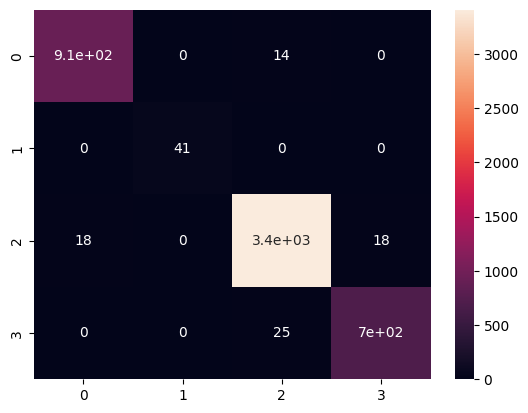

In [52]:
# show confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [53]:
print("\nFeature Importance:")
importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))


Feature Importance:
o3               0.622453
pm10             0.264285
critical_PM25    0.062871
so2              0.023415
co               0.017033
no2              0.009944
critical_CO      0.000000
critical_NO2     0.000000
critical_O3      0.000000
critical_PM10    0.000000
critical_SO2     0.000000
dtype: float64


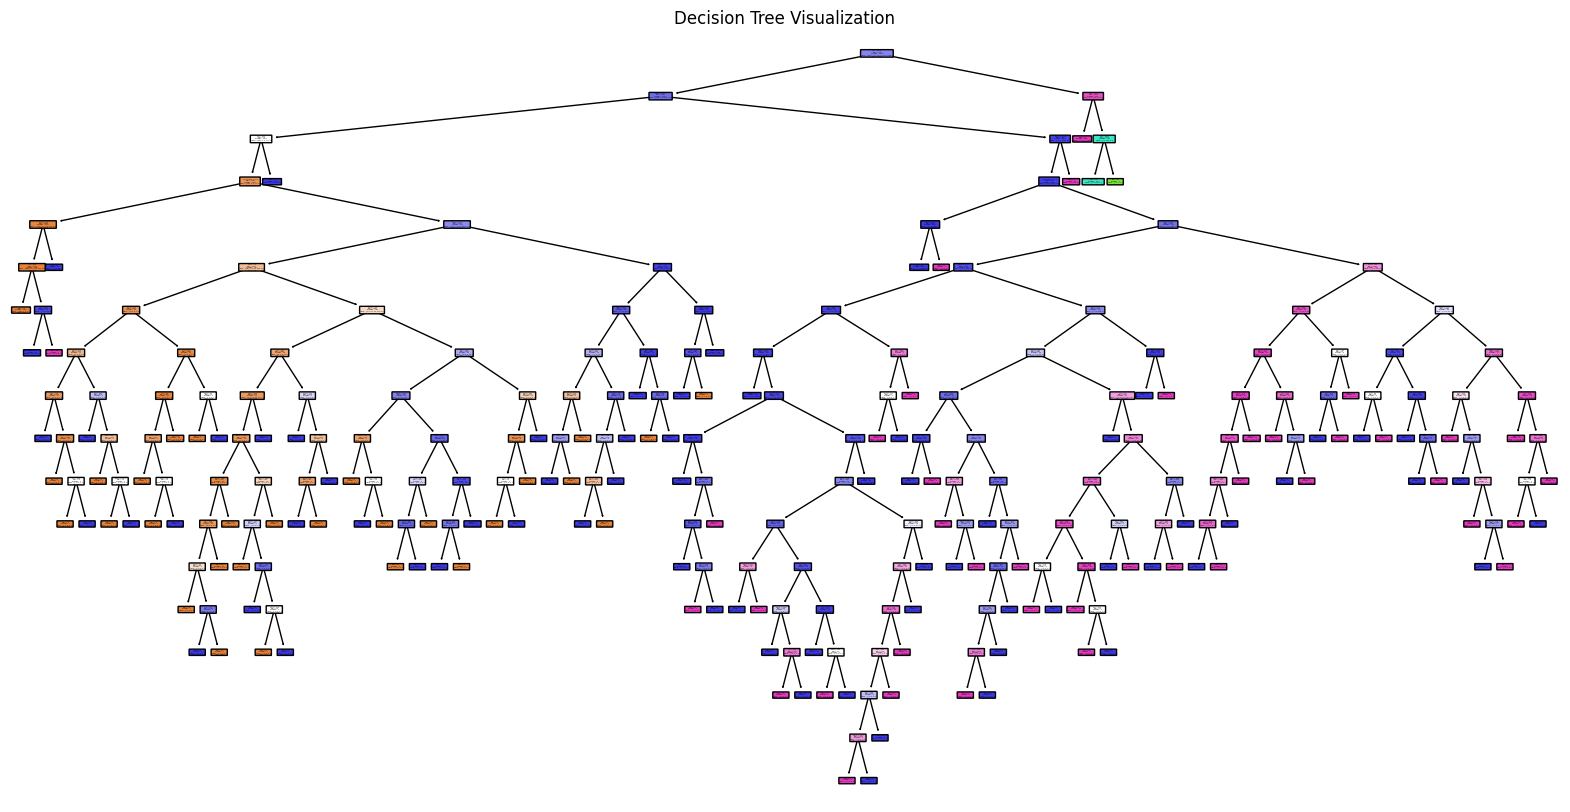

In [54]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [55]:
import pandas as pd

# Define a function to preprocess and predict new input data
def preprocess_and_predict(new_data, model, feature_columns):
    # Convert the new data to a DataFrame
    new_data_df = pd.DataFrame(new_data)
    
    # Get dummies for categorical columns
    new_data_df = pd.get_dummies(new_data_df, columns=['stasiun', 'critical'])
    
    # Align the new data with the feature columns of the model
    new_data_df = new_data_df.reindex(columns=feature_columns, fill_value=0)
    
    # Predict the category using the trained model
    predictions = model.predict(new_data_df)
    
    return predictions

# Masukkan data input baru
new_data = [{
    'tanggal': '2024-05-21',
    'stasiun': 'DKI1 (Bunderan HI)',
    'pm10': 10.0,
    'so2': 4.0,
    'co': 118.0,
    'o3': 5.0,
    'no2': 0,
    'max': 118.0,
    'critical': 'CO'
}]

predicted_category = preprocess_and_predict(new_data, model, X_train.columns)
print(predicted_category)

['TIDAK SEHAT']


Accuracy: 0.98539435248296
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       928
           2       0.98      1.00      0.99        41
           3       0.99      0.99      0.99      3445
           4       0.98      0.96      0.97       721

    accuracy                           0.99      5135
   macro avg       0.98      0.99      0.99      5135
weighted avg       0.99      0.99      0.99      5135

[[ 921    0    7    0]
 [   0   41    0    0]
 [  10    0 3421   14]
 [   0    1   27  693]]


<Axes: >

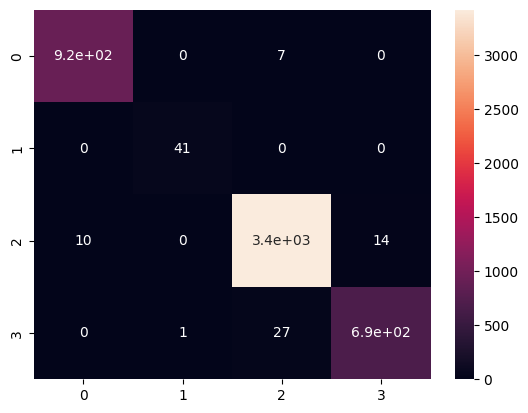

In [56]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Melakukan encoding pada label kelas
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize XGBoost classifier
model_xgb = xgb.XGBClassifier()

# Latih model
model_xgb.fit(X_train, y_train_encoded)

# Lakukan prediksi
y_pred_xgb = model_xgb.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test_encoded, y_pred_xgb))
print(confusion_matrix(y_test_encoded, y_pred_xgb))

# Tampilkan confusion matrix
sns.heatmap(confusion_matrix(y_test_encoded, y_pred_xgb), annot=True)
